In [1]:
import torch

In [40]:
# Crear un tensor vacío
tensor_vacio = torch.empty(3, 3)  # 3x3 sin inicializar
print("Tensor vacío:")
tensor_vacio


Tensor vacío:


tensor([[-7.2252e-35,  8.8982e-43,  5.6125e-01],
        [ 5.5277e-01,  8.3338e-01,  3.2504e-01],
        [ 9.9651e-01,  3.5166e-01,  4.4490e-01]])

In [10]:
tensor_random = torch.rand(3, 3)
print("Tensor aleatorio:")
print(tensor_random)

Tensor aleatorio:
tensor([[0.0999, 0.7936, 0.4332],
        [0.1255, 0.0435, 0.9421],
        [0.8486, 0.4453, 0.3495]])


In [22]:
tensor_random_2 = torch.rand(3, 3) * (20 - 10) + 10
tensor_random_2

tensor([[13.3499, 11.1950, 16.1251],
        [19.7878, 15.4527, 15.1269],
        [14.4118, 19.1310, 12.5540]])

In [41]:
tensor_normal = torch.randn(3, 3)
print(tensor_normal)

tensor([[-0.2731,  1.3950,  0.2728],
        [-0.1344,  0.9675,  1.1878],
        [-0.6753, -0.0292,  0.7935]])


In [11]:
# Crear un tensor lleno de ceros o unos
tensor_ceros = torch.zeros(3, 3)
tensor_unos = torch.ones(3, 3)
print("Tensor de ceros:")
print(tensor_ceros)
print("\nTensor de unos:")
print(tensor_unos)

Tensor de ceros:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Tensor de unos:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [17]:
# Crear un tensor con valores personalizados
tensor_manual = torch.tensor([[1, 2], [3, 4]])
print("Tensor personalizado:")
print(tensor_manual)

Tensor personalizado:
tensor([[1, 2],
        [3, 4]])


In [20]:
# Ver la forma, el tipo de datos y el dispositivo del tensor
print("Forma del tensor:", tensor_manual.shape)
print("Tipo de datos:", tensor_manual.dtype)
print("Dispositivo:", tensor_manual.device)


Forma del tensor: torch.Size([2, 2])
Tipo de datos: torch.int64
Dispositivo: cpu


In [21]:
# Comprobar si hay una GPU disponible
dispositivo = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando el dispositivo:", dispositivo)

# Crear un tensor y moverlo a la GPU
tensor = torch.tensor([1.0, 2.0, 3.0])
tensor_gpu = tensor.to(dispositivo)
print("\nTensor en GPU:", tensor_gpu)

# Realizar operaciones en la GPU
resultado = tensor_gpu * 2
print("\nResultado en GPU:", resultado)

# Mover el tensor de vuelta a la CPU
resultado_cpu = resultado.to('cpu')
print("\nResultado de vuelta en la CPU:", resultado_cpu)

Usando el dispositivo: cpu

Tensor en GPU: tensor([1., 2., 3.])

Resultado en GPU: tensor([2., 4., 6.])

Resultado de vuelta en la CPU: tensor([2., 4., 6.])


In [43]:
import torch
print(torch.cuda.is_available())  # Esto debe devolver True si CUDA está configurado correctamente.
# print(torch.cuda.device_count())  # Número de GPUs disponibles.
# print(torch.cuda.get_device_name(0))  # Nombre de la GPU.


False


In [44]:
import torch
print("CUDA está disponible:", torch.cuda.is_available())
print("Versión de CUDA en PyTorch:", torch.version.cuda)


CUDA está disponible: False
Versión de CUDA en PyTorch: None


### Capas básicas en torch.nn:
  * De procesamiento (layers)
    * Linear
    * Conv2d
    * ConvTranspose2d
    * LSTM
    * GRU
    * Transformer
    * Embeeding
  * De activación
    * Sigmoid
    * Tanh
    * ReLU
    * LeakyReLU
    * Softmax
  * Auxiliares
    * Dropout
    * MaxPool2d
    * BatchNorm2d
    * LocalResponseNorm
    * Flatten

### 1. Capas de procesamiento (layers):
Estas capas son las principales para construir modelos y procesar datos.

In [45]:
import torch
import torch.nn as nn


# Linear: Una capa completamente conectada (o densa). Realiza una transformación lineal 𝑦= 𝑥𝑊^𝑇 + 𝑏  
linear = nn.Linear(in_features=3, out_features=2)
x = torch.tensor([[1.0, 2.0, 3.0]])
print(linear(x))  # Salida transformada


tensor([[-0.5618, -0.4485]], grad_fn=<AddmmBackward0>)


In [46]:
# Conv2d: Realiza convoluciones 2D, comúnmente usada para procesar imágenes.
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
x = torch.rand(1, 1, 5, 5)  # Lote de una imagen 5x5 con 1 canal
print(conv(x))  # Salida convolucionada


tensor([[[[-0.1023, -0.2253,  0.1569],
          [ 0.0596,  0.2316,  0.0564],
          [ 0.1567, -0.1324, -0.0601]]]], grad_fn=<ConvolutionBackward0>)


- 1: Hay 1 imagen en el lote.
- 1: Cada imagen tiene 1 canal.
- 5x5: Cada imagen tiene un tamaño de 5×5


In [61]:
x = torch.rand(1, 1, 5, 5)
x


tensor([[[[0.1088, 0.1637, 0.7025, 0.6790, 0.9155],
          [0.2418, 0.1591, 0.7653, 0.2979, 0.8035],
          [0.3813, 0.7860, 0.1115, 0.2477, 0.6524],
          [0.6057, 0.3725, 0.7980, 0.8399, 0.1374],
          [0.2331, 0.9578, 0.3313, 0.3227, 0.0162]]]])

In [69]:
# Fijar semilla
torch.manual_seed(42)

# Crear un tensor aleatorio
x = torch.rand(1, 1, 5, 5)
print(x)


tensor([[[[0.8823, 0.9150, 0.3829, 0.9593, 0.3904],
          [0.6009, 0.2566, 0.7936, 0.9408, 0.1332],
          [0.9346, 0.5936, 0.8694, 0.5677, 0.7411],
          [0.4294, 0.8854, 0.5739, 0.2666, 0.6274],
          [0.2696, 0.4414, 0.2969, 0.8317, 0.1053]]]])


In [65]:
# ConvTranspose2d: Realiza una "convolución transpuesta", útil para tareas de generación (como redes generativas).

trans_conv = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3)
x = torch.rand(1, 1, 5, 5)
print(trans_conv(x))  # Salida

tensor([[[[-0.1648, -0.2234, -0.2693, -0.1059, -0.2168, -0.4298, -0.3323],
          [-0.0511, -0.2595, -0.2959, -0.0883, -0.2194, -0.3838, -0.3837],
          [-0.1817, -0.1986,  0.0496, -0.2829, -0.2060, -0.0917,  0.0328],
          [-0.1686, -0.0728, -0.2638, -0.1640, -0.0364, -0.0406, -0.1803],
          [-0.0090, -0.2742, -0.2471, -0.0399, -0.1489, -0.3335, -0.2942],
          [-0.2075, -0.2567,  0.1085, -0.1251, -0.0994, -0.0248,  0.0501],
          [-0.2951, -0.1609, -0.0496, -0.1198, -0.0763,  0.0017, -0.0618]]]],
       grad_fn=<ConvolutionBackward0>)


In [86]:
# LSTM y GRU: Son redes recurrentes para datos secuenciales como texto o series temporales.

lstm = nn.LSTM(input_size=3, hidden_size=2, batch_first=True)
x = torch.rand(1, 4, 3)  # Lote con secuencia de longitud 4 y tamaño 3
print(lstm(x))  # Salida (hidden states y hidden final)


(tensor([[[-0.0583,  0.2664],
         [-0.0813,  0.3540],
         [-0.1830,  0.4887],
         [-0.1126,  0.5353]]], grad_fn=<TransposeBackward0>), (tensor([[[-0.1126,  0.5353]]], grad_fn=<StackBackward0>), tensor([[[-0.2308,  0.7948]]], grad_fn=<StackBackward0>)))


In [87]:
# Transformer: Implementación básica de transformadores para NLP.

transformer = nn.Transformer(d_model=512, nhead=8)
src = torch.rand(10, 32, 512)  # Secuencia de 10, batch de 32
tgt = torch.rand(20, 32, 512)
print(transformer(src, tgt))  # Salida transformada


c:\Users\34640\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


tensor([[[-1.5384,  0.2157, -1.7964,  ..., -1.9438, -1.1512, -0.3414],
         [-1.7553, -0.1442, -1.4974,  ..., -1.3659, -1.1200, -0.5368],
         [-1.4746, -0.4905, -2.1174,  ..., -1.4930, -1.4591,  1.3980],
         ...,
         [-1.6475,  0.2279, -1.2693,  ..., -1.0877, -1.0083, -0.5880],
         [-0.8223, -0.3251, -2.7302,  ..., -1.9302, -2.0892, -1.0509],
         [-1.1873, -0.2369, -1.9803,  ..., -1.2396, -1.3874, -1.2241]],

        [[-0.8761,  0.0370, -1.6600,  ..., -1.9562, -1.2226, -0.3018],
         [-1.8721, -0.0072, -0.9006,  ..., -1.7600, -2.0460,  0.4842],
         [-1.2738, -0.4549, -1.9027,  ..., -1.3531, -1.6655, -0.7205],
         ...,
         [-1.4730, -0.2972, -2.4643,  ..., -2.0886,  0.1140, -0.6950],
         [-1.0263,  0.3435, -1.4559,  ..., -1.1128, -1.6498,  1.1771],
         [-0.9823,  0.3561, -1.8716,  ..., -2.5966, -1.7647,  0.0497]],

        [[-1.8313,  0.5129, -1.6190,  ..., -1.6533, -1.7796,  0.0776],
         [-0.0791, -0.1362, -1.8106,  ..., -1

In [88]:
# Embedding: Convierte índices en vectores densos, útil en NLP.
embedding = nn.Embedding(num_embeddings=10, embedding_dim=3)
x = torch.tensor([1, 2, 3])
print(embedding(x))  # Vectores densos



tensor([[-2.6830,  0.7343, -0.3855],
        [-1.7161,  0.9553, -2.2004],
        [ 0.4203,  1.4100, -0.1623]], grad_fn=<EmbeddingBackward0>)


### 2. Capas de activación:
Estas introducen no linealidades al modelo.

- Sigmoid: Comprime valores entre 0 y 1
- Tanh: Comprime valores entre 1 y 1
- ReLU y LeakyReLU: Rectificadores que eliminan valores negativos.
- Softmax: Normaliza los valores en probabilidades.

In [89]:
activation = nn.ReLU()
x = torch.tensor([-1.0, 2.0, -0.5])
print(activation(x))  # [0.0, 2.0, 0.0]


tensor([0., 2., 0.])


### 3. Capas auxiliares:
Estas ayudan en el entrenamiento o procesamiento de datos.


In [90]:
# Dropout: Apaga aleatoriamente neuronas para evitar sobreajuste.
dropout = nn.Dropout(p=0.5)
x = torch.rand(5)
print(dropout(x))  # Algunos valores serán 0


tensor([0.0000, 0.8980, 0.2642, 0.0000, 1.3410])


In [91]:
# MaxPool2d: Reduce dimensionalidad seleccionando valores máximos en ventanas.
pool = nn.MaxPool2d(kernel_size=2)
x = torch.rand(1, 1, 4, 4)
print(pool(x))  # Matriz reducida


tensor([[[[0.9485, 0.8538],
          [0.9801, 0.9988]]]])


In [92]:
# BatchNorm2d: Normaliza las activaciones para mejorar la estabilidad.
bn = nn.BatchNorm2d(1)
x = torch.rand(1, 1, 4, 4)
print(bn(x))  # Salida normalizada


tensor([[[[-0.3698,  0.5672,  0.5968, -0.1759],
          [-2.6063,  1.0679, -1.6371,  0.6787],
          [ 0.3492,  0.3053,  0.9178,  0.8488],
          [-0.9891,  1.0175, -0.5335, -0.0377]]]],
       grad_fn=<NativeBatchNormBackward0>)


In [93]:
# Flatten: Convierte datos multi-dimensionales en un vector 1D
flatten = nn.Flatten()
x = torch.rand(1, 1, 4, 4)
print(flatten(x))  # Vector 1D


tensor([[0.5359, 0.6655, 0.5985, 0.9445, 0.9084, 0.9944, 0.5636, 0.1577, 0.0906,
         0.4134, 0.3144, 0.8716, 0.9580, 0.4522, 0.5092, 0.3494]])


mamahuevaso

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: función seno
x = np.linspace(-np.pi, np.pi, 2000, dtype=np.float32)
y = np.sin(x, dtype=np.float32)

# Convertir datos a tensores
x_tensor = torch.tensor(x).unsqueeze(1)  # Agregar dimensión para que sea (batch, 1)
y_tensor = torch.tensor(y).unsqueeze(1)

# Definir el modelo
class SineMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),  # Capa densa: 1 entrada -> 16 neuronas
            nn.ReLU(),         # Activación no lineal
            nn.Linear(16, 1)   # Capa de salida: 16 neuronas -> 1 salida
        )

    def forward(self, x):
        return self.model(x)

# Crear el modelo
model = SineMLP()

# Función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Función de entrenamiento
def train(model, x, y, epochs=1000):
    for epoch in range(epochs):
        # Paso hacia adelante
        output = model(x)
        loss = criterion(output, y)
        
        # Paso hacia atrás
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Imprimir progreso
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Entrenar el modelo
train(model, x_tensor, y_tensor, epochs=1000)

# Predicción y visualización
with torch.no_grad():
    y_pred = model(x_tensor).numpy()

plt.plot(x, y, label="True (sin(x))")
plt.plot(x, y_pred, label="Predicted", linestyle="dashed")
plt.legend()
plt.show()


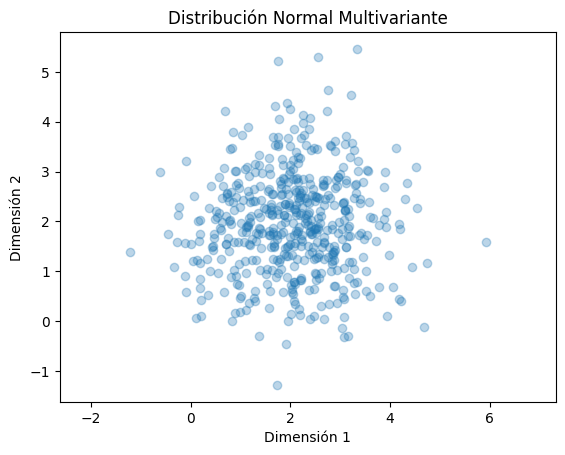

In [96]:
import numpy as np
import matplotlib.pyplot as plt

num = 500  # Número de muestras

# Generar muestras
data = np.random.multivariate_normal([2, 2], np.array([[1, 0], [0, 1]]), num)

# Graficar los datos generados
plt.scatter(data[:, 0], data[:, 1], alpha=0.3)
plt.title("Distribución Normal Multivariante")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.axis('equal')
plt.show()
